## Library setup

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def relu(Z):
  return np.maximum(Z, 0)

def sigmoid(Z):
  return 1 / (1 + np.exp(-Z))

def relu_backward(Z):
  dZ = np.array(Z, copy=True) # just converting dz to a correct object.
  
  # When z <= 0, you should set dz to 0 as well. 
  dZ[Z <= 0] = 0
  
  assert (dZ.shape == Z.shape)
  
  return dZ

In [0]:
HIDDEN1=32
HIDDEN2=16

pos_weight = 1

def initialize_parameters(num_nodes):
  W1 = np.random.normal(
    loc=0, scale=1, size=(num_nodes, HIDDEN1))
  W2 = np.random.normal(
      loc=0, size=(W1.shape[1], HIDDEN2))
  
  parameters = {"W1": W1,
                "W2": W2}
    
  return parameters

def forward_propagation(A_hat, D_hat, X, parameters):
  W1 = parameters["W1"]
  W2 = parameters["W2"]

  Z1 = (D_hat**-1 * A_hat * X) @ W1
  H1 = relu(Z1)
  Z2 = (D_hat**-1 * A_hat * H1) @ W2
  
  H2 = Z2
  #Embedding does not need an activation function (act = lambda x: x)


  reconstruction = sigmoid(H2 @ H2.T)

  cache = {"Z1": Z1,
           "H1": H1,
           "Z2": Z2,
           "H2": H2}
  return H2, cache, reconstruction 

# Compute cost for known labels

def compute_cost(reconstruction, Y, parameters):
  m = reconstruction.shape[0]**2 
  logprobs = np.multiply(Y, np.log(reconstruction))*pos_weight + np.multiply(1-Y, np.log(1-reconstruction))
  cost = -1/m * np.sum(logprobs)
  cost = float(np.squeeze(cost))

  return cost

def backward_propagation(parameters, cache, X, Y, D_hat, A_hat):
  m = X.shape[0]**2

  W1 = parameters["W1"]
  W2 = parameters["W2"]

  H1 = cache["H1"]
  H2 = cache["H2"]
  Z1 = cache["Z1"]
  Z2 = cache["Z2"]


  A = sigmoid(H2 @ H2.T)
  
  dZ2 = (A-Y*pos_weight) @ H2 
  dW2 = (1/m * (D_hat**-1 * A_hat * H1).T @ dZ2)

  dZ1 = np.multiply(dZ2 @ W2.T, relu_backward(Z1)) 
  dW1 = 1/m * (D_hat**-1 * A_hat * X) @ dZ1

  grads = {"dW1": dW1,
            "dW2": dW2}
      
  return grads

def update_parameters(parameters, grads, learning_rate):
  W1 = parameters["W1"]
  W2 = parameters["W2"]

  dW1 = grads["dW1"]
  dW2 = grads["dW2"]

  W1 = W1 - learning_rate * dW1
  W2 = W2 - learning_rate * dW2

  parameters = {"W1": W1,
                "W2": W2}
    
  return parameters

def precision_score(reconstruction, Y):
  valid = Y
  predictions = (reconstruction > 0.5).astype(int)
  correct = 0

  # This creates a cross product which slows down the training greatly!
  for i in range(valid.shape[0]):
    for j in range(valid.shape[1]):
      if i != j:
        if predictions[i, j] == valid[i,j]:
          correct += 1
  return correct / predictions.shape[0]**2

In [0]:
def train_model(A_hat, D_hat, X, Y, num_nodes, learning_rate = 0.1, num_iterations = 11000, print_cost=False):
    
    # We use a seed to stabilize the results during development
    np.random.seed(3)
    
    costs = []
    # Initialize parameters
    parameters = initialize_parameters(num_nodes)
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "A_hat, D_hat, X, parameters". Outputs: "H2, cache, reconstruction".
        H2, cache, reconstruction = forward_propagation(A_hat, D_hat, X, parameters)
        
        # Cost function. Inputs: "reconstruction, Y, parameters". Outputs: "cost".
        cost = compute_cost(reconstruction, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y, D_hat, A_hat". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y, D_hat, A_hat)
 
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Slows down training greatly. Comment in if you want to see the precision
        #precision = precision_score(reconstruction, Y)
        precision = "na"

        # Print the cost every 100 training example    
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)), "\t Precision: {}".format(precision))
        if print_cost:
            costs.append(cost)
        

    # plot the cost

    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per thousands)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return H2, parameters



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in multiply


Cost after iteration 0: nan 	 Precision: na
Cost after iteration 1000: 0.6947546399492087 	 Precision: na
Cost after iteration 2000: 0.6940394352438536 	 Precision: na
Cost after iteration 3000: 0.6937450162923798 	 Precision: na
Cost after iteration 4000: 0.6935893891201569 	 Precision: na
Cost after iteration 5000: 0.6934955222209183 	 Precision: na
Cost after iteration 6000: 0.6934339356870032 	 Precision: na
Cost after iteration 7000: 0.6933910243972359 	 Precision: na
Cost after iteration 8000: 0.6933597047803386 	 Precision: na
Cost after iteration 9000: 0.6933359628684613 	 Precision: na
Cost after iteration 10000: 0.6933173756831396 	 Precision: na


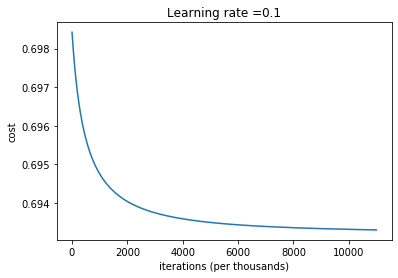

In [0]:
import numpy as np
from networkx import networkx, karate_club_graph, to_numpy_matrix
zkc = karate_club_graph()
order = sorted(list(zkc.nodes()))
# Adjacency matrix
A = to_numpy_matrix(zkc, nodelist=order)
# Identity matrix
I = np.eye(zkc.number_of_nodes())
# Adding self loops to consider nodes' own features.
A_hat = A + I
# Degree Matrix derived from A_hat
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))
num_nodes = zkc.number_of_nodes()
Y = A

H2, parameters = train_model(A_hat, D_hat, Y, I, num_nodes, print_cost=True)



In [0]:
# Accuracy testing

test = sigmoid(H2@H2.T)
preds_matrix = (test > 0.5).astype(int)

valid = Y
correct = 0

for i in range(valid.shape[0]):
  for j in range(valid.shape[1]):
    if i != j:
      if preds_matrix[i, j] == valid[i,j]:
        correct += 1

print("Accuracy: " + str(correct/valid.shape[0]**2))
print("Correct examples: " + str(correct))

Accuracy: 0.8391003460207612
Correct examples: 970


In [0]:
# Make prediction where a link does not yet exist:

# Change node number to make a link prediction on a given node
# Results are based on all node embeddings as well as the top 3 nodes for which there is no link yet.
node = 25

labels = valid[node].astype(int).tolist()[0]
predictions = []
indexes = []

best_indexes = np.argsort(-test[node]).tolist()[0]

for index in best_indexes:
  if index != node and labels[index] != 1:
    predictions.append(index)

print("All predictions (including existing links): " + str(predictions))
print("Best 3 predictions: " + str(predictions[:3]))
# print graph edges
#g.edges()

All predictions (including existing links): [27, 22, 21, 20, 19, 18, 17, 15, 14, 0, 12, 11, 10, 9, 8, 7, 30, 4, 3, 2, 1, 28, 13, 32, 33, 29, 26, 6, 5, 16]
Best 3 predictions: [27, 22, 21]


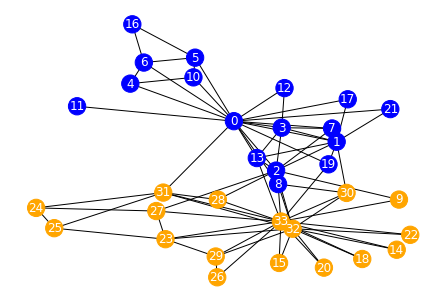

In [0]:
# Graph with real edges
# The node colors aren't important in this case, since we are only predicting edges and not classifying nodes
labels = []
for i in range(len(zkc.nodes())):
  if zkc.nodes()[i]['club'] == 'Mr. Hi':
    labels.append(0)
  else:
    labels.append(1)

color_labels = ['blue' if l == 0 else 'orange' for l in labels]
networkx.draw(zkc, with_labels=True, node_color=color_labels, font_color='white')